See https://twiki.cern.ch/twiki/bin/view/ABPComputing/LhcDataStorage from cern.ch/abp-computing.

EOS space could be mounted with xrootd

```
xrootdfs /eos -o rdr=root://eosuser.cern.ch//eos
```
or logging to `lxplus-cb6`

In [1]:
import pagestore
db=pagestore.PageStore('/eos/project/abpdata/lhc/lhc.db',
                       '/eos/project/abpdata/lhc/datadb/')

In [3]:
db.search('%BBQ%ACQ_DATA%')

[u'LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_V',
 u'LHC.BQBBQ.CONTINUOUS.B1:ACQ_DATA_V',
 u'LHC.BQBBQ.CONTINUOUS.B1:ACQ_DATA_H',
 u'LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_H',
 u'LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H',
 u'LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V',
 u'LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H',
 u'LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_V',
 u'LHC.BQBBQ.UA43.FFT1_B2:ACQ_DATA_H',
 u'LHC.BQBBQ.UA43.FFT1_B2:ACQ_DATA_V',
 u'LHC.BQBBQ.UA47.FFT1_B1:ACQ_DATA_H',
 u'LHC.BQBBQ.UA47.FFT1_B1:ACQ_DATA_V']

In [4]:
t1,t2=db.get_lim('LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H')
t1,t2=db.get_lim('LHC.BQBBQ.CONTINUOUS.B1:ACQ_DATA_H')

In [5]:
print pagestore.dumpdate(t1)
print pagestore.dumpdate(t2)

2012-06-18 17:00:00.030
2013-02-16 23:53:59.963


In [12]:
import time

In [17]:
now=time.time()
bbq1h='LHC.BQBBQ.CONTINUOUS.B1:ACQ_DATA_H'
data=db.get(bbq1h,t1,t1+4000)
tt,vv=data[bbq1h]
spent=time.time()-now
print("Downloaded %g MB in %g MB/s"%(vv.nbytes/1e6,vv.nbytes/spent/1e6))

Downloaded 51.201 MB in 6.62949 MB/s


In [21]:
print(vv.shape)

(50001, 1024)


In [22]:
vvv=pagestore.flattenoverlap(vv)

Flatten: ...
average overlap 124.36 samples


In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt

/cvmfs/sft.cern.ch/lcg/views/LCG_84swan2/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


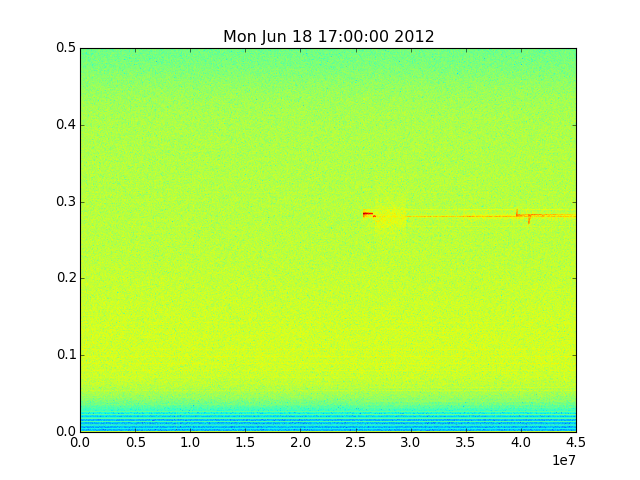

In [30]:
plt.figure()
out=plt.specgram(vvv,Fs=1,NFFT=2048,noverlap=128)
plt.title(time.asctime(time.localtime(t1)))

<IPython.core.display.Javascript object>


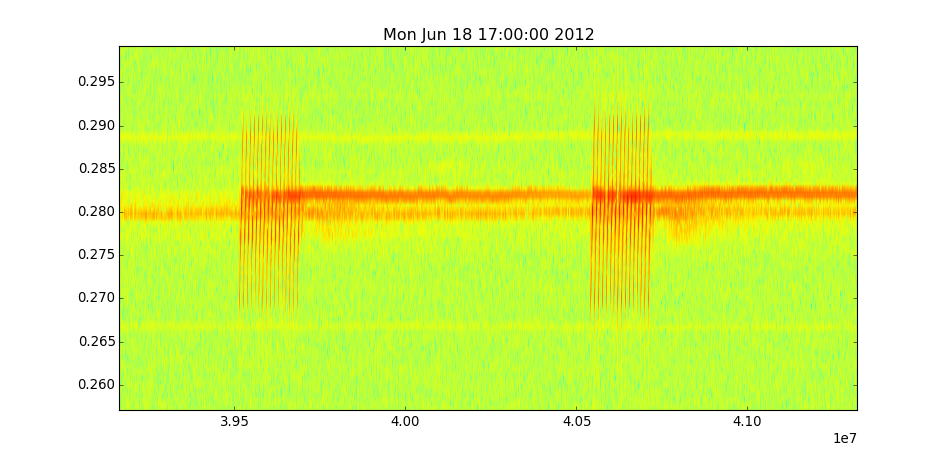

In [31]:
plt.figure()
out=plt.specgram(vvv,Fs=1,NFFT=2048,noverlap=128)
plt.title(time.asctime(time.localtime(t1)))

In [34]:
xl=plt.xlim(); yl=plt.ylim()

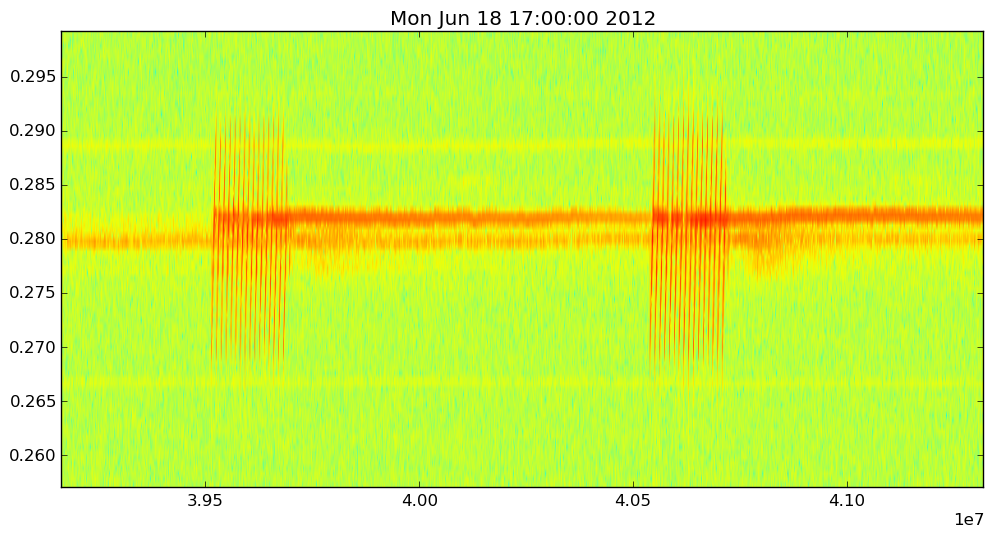

In [35]:
plt.xlim(*xl);plt.ylim(*yl);
plt.gcf()